In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3210,ham,"OH YEAH,AND HAV A GREAT TIME IN NEWQUAY-SEND M...",NaN,NaN,NaN
2928,ham,Where wuld I be without my baby? The thought a...,NaN,NaN,NaN
3346,ham,No problem baby. Is this is a good time to tal...,NaN,NaN,NaN
3806,ham,Pls dont restrict her from eating anythin she ...,NaN,NaN,NaN
458,ham,1.20 that call cost. Which i guess isnt bad. M...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
#data cleaning
#EDA
#text preprocessing
#model building
#evaluation
#improvement
#website
#deploy

# Data cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
## we will drop unnamed 2,3,4 as they conatin very less known values
df.drop(columns = ['Unnamed: 2' ,'Unnamed: 3','Unnamed: 4'],inplace = True)

# 

In [8]:
df.sample(5)

,v1,v2
1202,ham,"Me also da, i feel yesterday night wait til 2..."
2689,ham,"Ya ok, vikky vl c witin &lt;#&gt; mins and il..."
5090,ham,"St andre, virgil's cream"
3166,ham,"When people see my msgs, They think Iam addict..."
3077,ham,Okay but i thought you were the expert


In [9]:
#rename the columns
df.rename(columns={'v1':'target' , 'v2':'text'},inplace=True)
df.sample(5)

,target,text
1208,ham,Also maaaan are you missing out
3120,ham,Small problem in auction:)punj now asking tiwary
1703,ham,Just taste fish curry :-P
4608,ham,Y de asking like this.
2773,spam,How come it takes so little time for a child w...


In [10]:
#instead of ham i need numbers like(1,0)
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
df['target'] = encoder.fit_transform(df['target'])
df.head()
## spam ==1 and ham ==0

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
#checking missing values
df.isnull().sum()


target    0
text      0
dtype: int64

In [13]:
#checking duplicate values
df.duplicated().sum()

403

In [14]:
df=df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [15]:
df.shape

(5169, 2)

## 2.EDA(Exploratory data analysis)

In [16]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

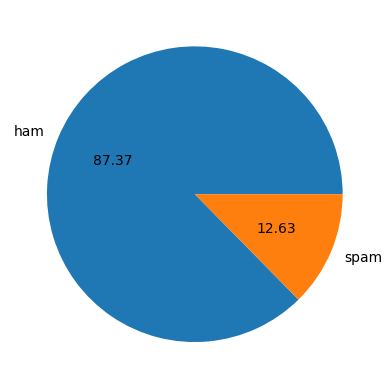

In [17]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts() , labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [18]:
#data is imbalance

In [19]:
#next we will analyze message 
#i.e we will check :
#number of characters
#number of words
#number of sentences 

In [20]:
pip install nltk


Note: you may need to restart the kernel to use updated packages.


In [21]:
import nltk

In [22]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
df['num_characters']=df['text'].apply(len)


In [24]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [25]:
#num of words
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [27]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [28]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [29]:
df['num_sentences'] = df['text'].apply(lambda x:nltk.sent_tokenize(x))

In [30]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,"[Go until jurong point, crazy.., Available onl..."
1,0,Ok lar... Joking wif u oni...,29,8,"[Ok lar..., Joking wif u oni...]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,[Free entry in 2 a wkly comp to win FA Cup fin...
3,0,U dun say so early hor... U c already then say...,49,13,[U dun say so early hor... U c already then sa...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,"[Nah I don't think he goes to usf, he lives ar..."


In [31]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [32]:
df[['num_characters' , 'num_words' ,'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [33]:
#for ham messages
df[df['target']==0][['num_characters' , 'num_words' ,'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [34]:
df[df['target']==1][['num_characters' , 'num_words' ,'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


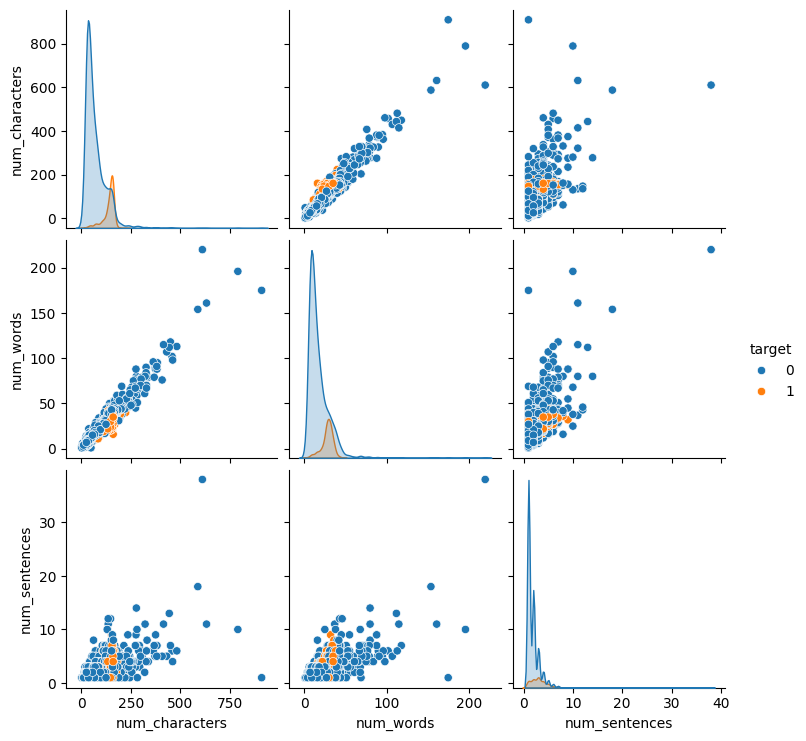

In [35]:
import seaborn as sns
sns.pairplot(df , hue='target')

In [36]:
# Selecting only numeric columns
numeric_df = df.drop(columns=['text'])

# Computing the correlation matrix
numeric_df.corr()



,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


<Axes: >

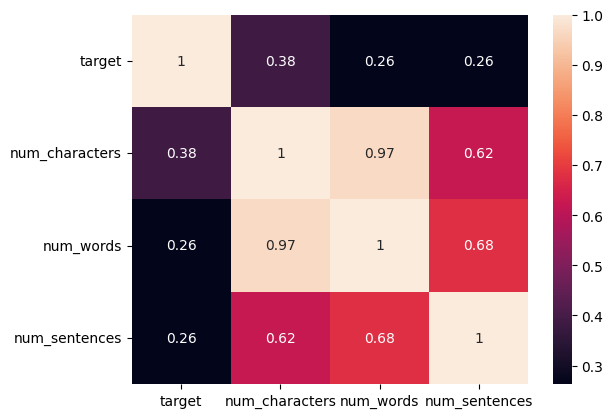

In [37]:
sns.heatmap(numeric_df.corr() ,annot=True)

# 3. Data Preprocessing
* lower case
* tokenization
* removing special char
* removing stop words and punctuations
* stemming

In [38]:
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
def tranform_text(text):
    
    text = text.lower()
    text = nltk.word_tokenize(text)
    y=[]
    ## removing special char
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') :
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y) ## return string

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [39]:
tranform_text('HI how Are now won() @ %% you anamika <> . how are you? .i am fine!!')

'hi anamika fine'

In [40]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [41]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [42]:

from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('dancing')

'danc'

In [43]:
df['transformed_text'] = df['text'].apply(tranform_text)

In [44]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [45]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [46]:
# now we will chwck the frequency of words
from wordcloud import WordCloud
wc = WordCloud(width=500 , height =500,min_font_size=10,background_color='white')

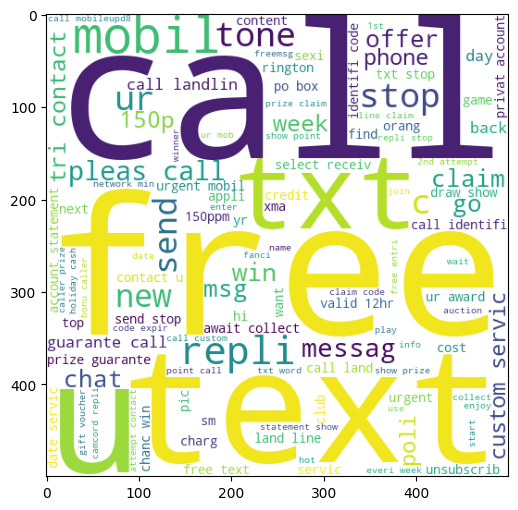

In [47]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

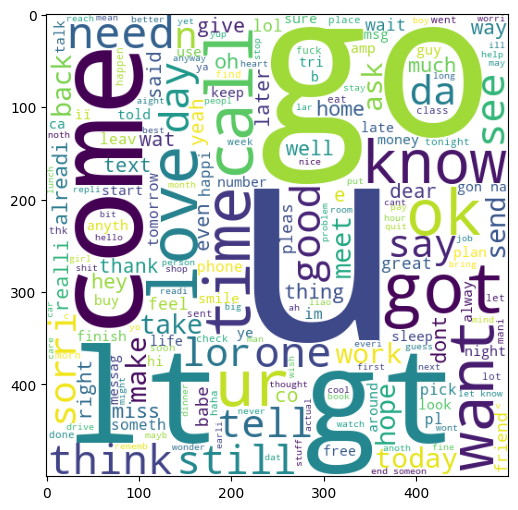

In [48]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [49]:
## top 30 words
##custom code
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [50]:
from collections import Counter
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [51]:
from collections import Counter
Counter(ham_corpus).most_common(30)

[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234),
 ('call', 233),
 ('time', 219),
 ('ok', 217),
 ('love', 216),
 ('good', 213),
 ('want', 208),
 ('ur', 197),
 ('day', 190),
 ('need', 170),
 ('one', 165),
 ('lor', 159),
 ('4', 156),
 ('home', 152),
 ('think', 149),
 ('see', 147),
 ('take', 143),
 ('still', 143),
 ('da', 142),
 ('tell', 133),
 ('make', 129)]

#### 4.Model Building

In [52]:
## as input is transformed_text which is not integer or numerical so first we will convert input to numerical values or vectorise
#bag of words->frequent words ka column-->each sms me vo frequent words kitni bar aa rahe hai -->those number form vector


In [53]:
from sklearn.feature_extraction.text import CountVectorizer
cv= CountVectorizer()

In [54]:
X=cv.fit_transform(df['transformed_text']).toarray()

In [55]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [56]:
X.shape

(5169, 6708)

In [57]:
y=df['target'].values

In [58]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [59]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
import pandas as pd
mnb = MultinomialNB()
gnb = GaussianNB()  # Note: GaussianNB expects input with shape (n_samples, n_features)
bnb = BernoulliNB()


In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [61]:
mnb.fit(X_train, y_train)
y_predict_mnb = mnb.predict(X_test)

print("MultinomialNB Accuracy:", accuracy_score(y_test, y_predict_mnb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_predict_mnb))
print("Precision Score:", precision_score(y_test, y_predict_mnb))

print("\n")

bnb.fit(X_train, y_train)
y_predict_bnb = bnb.predict(X_test)

print("BernoulliNB Accuracy:", accuracy_score(y_test, y_predict_bnb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_predict_bnb))
print("Precision Score:", precision_score(y_test, y_predict_bnb))

print("\n")

gnb.fit(X_train, y_train)
y_predict_gnb = gnb.predict(X_test)

print("gaussianiNB Accuracy:", accuracy_score(y_test, y_predict_gnb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_predict_gnb))
print("Precision Score:", precision_score(y_test, y_predict_gnb))

MultinomialNB Accuracy: 0.9642166344294004
Confusion Matrix:
 [[871  25]
 [ 12 126]]
Precision Score: 0.8344370860927153


BernoulliNB Accuracy: 0.9700193423597679
Confusion Matrix:
 [[893   3]
 [ 28 110]]
Precision Score: 0.9734513274336283


gaussianiNB Accuracy: 0.8800773694390716
Confusion Matrix:
 [[792 104]
 [ 20 118]]
Precision Score: 0.5315315315315315


In [62]:
#if i use tfid vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features =3000)
X1 = tfidf.fit_transform(df['transformed_text']).toarray()

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.2, random_state=2)


mnb.fit(X1_train, y1_train)
y1_predict_mnb = mnb.predict(X1_test)

print("MultinomialNB Accuracy:", accuracy_score(y1_test, y1_predict_mnb))
print("Confusion Matrix:\n", confusion_matrix(y1_test, y1_predict_mnb))
print("Precision Score:", precision_score(y1_test, y1_predict_mnb))

print("\n")

bnb.fit(X1_train, y1_train)
y1_predict_bnb = bnb.predict(X1_test)

print("BernoulliNB Accuracy:", accuracy_score(y1_test, y1_predict_bnb))
print("Confusion Matrix:\n", confusion_matrix(y1_test, y1_predict_bnb))
print("Precision Score:", precision_score(y1_test, y1_predict_bnb))

print("\n")

gnb.fit(X1_train, y1_train)
y1_predict_gnb = gnb.predict(X1_test)

print("GaussianNB() Accuracy:", accuracy_score(y1_test, y1_predict_gnb))
print("Confusion Matrix:\n", confusion_matrix(y1_test, y1_predict_gnb))
print("Precision Score:", precision_score(y1_test, y1_predict_gnb))


MultinomialNB Accuracy: 0.9709864603481625
Confusion Matrix:
 [[896   0]
 [ 30 108]]
Precision Score: 1.0


BernoulliNB Accuracy: 0.9835589941972921
Confusion Matrix:
 [[895   1]
 [ 16 122]]
Precision Score: 0.991869918699187


GaussianNB() Accuracy: 0.8694390715667312
Confusion Matrix:
 [[788 108]
 [ 27 111]]
Precision Score: 0.5068493150684932


In [63]:
## we will choose tfid-->mnb

In [64]:
## i will check precision and accuracy for all the classifiers 

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [65]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [66]:
## i will check precision and accuracy for all the classifiers 

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [67]:

svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)


clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}


def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision



In [74]:
#accuracy_scores = []
#precision_scores = []

#for name,clf in clfs.items():
#    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    #print("For ",name)
    #print("Accuracy - ",current_accuracy)
    #print("Precision - ",current_precision)
    
#    accuracy_scores.append(current_accuracy)
#    precision_scores.append(current_precision)
#performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
print("njds:")

njds:


In [75]:

#performance_df

### improve model

In [76]:
##now if i add num_char column in input
## as after coding we observed that scaling wont improve the model
#from sklearn.feature_extraction.text import TfidfVectorizer
#tf_2=TfidfVectorizer(max_features=3000)
#X2= tf_2.fit_transform(df['transformed_text']).toarray()
#X2=np.hstack((X2,df['num_characters'].values.reshape(-1,1)))
#X2.shape


In [77]:
#X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.2, random_state=2)

#train_classifier(mnb,X2_train,y2_train,X2_test,y2_test)

In [78]:
## even after adding other attributes , we didn't observe any improvement
## finally i choose tfid-->mnb

In [80]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

# Load your dataset and preprocess it (df['transformed_text'], df['target'])
tfidf = TfidfVectorizer(max_features=6708)  # Adjust max_features if needed
X = tfidf.fit_transform(df['transformed_text']).toarray()
y = df['target'].values

# Train your model
model = MultinomialNB()
model.fit(X, y)

# Save the vectorizer and model
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(model, open('model.pkl', 'wb'))
